# 1 - DEFINE THE PROBLEM
This notebook uses the titanic3 dataset to explore AI concepts through machine learning.  
The goal is to predict whether a passenger survived the Titanic disaster.


# 2 - IMPORT REQUIRED LIBRARIES

## 2.1 - Base Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2.2 - ML/DL Libraries

In [2]:
#from sklearn.compose import ColumnTransformer
#from sklearn.impute import SimpleImputer
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler, OneHotEncoder
#from sklearn.pipeline import Pipeline
#from sklearn.tree import DecisionTreeClassifier


# 3 - LOAD THE DATA

In [3]:
data = pd.read_csv('../datasets/train.csv')

# 4 - EDA (Exploratory Data Analysis)

In [4]:
# Basic Overview
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Analyze Data Types
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# Display general information about the dataset
# Includes number of entries, non-null counts, and data types for each column
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
# Show summary statistics for numerical columns
# Includes count, mean, std deviation, min, 25%, median (50%), 75%, and max
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699113    0.523008   
std     257.353842    0.486592    0.836071   14.526507    1.102743   
min       1.000000    0.000000    1.000000    0.416700    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [8]:
# Check how many missing values exist in each column
# Useful for planning imputations or data cleaning strategies
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# 5 - VISUALIZE THE DATA

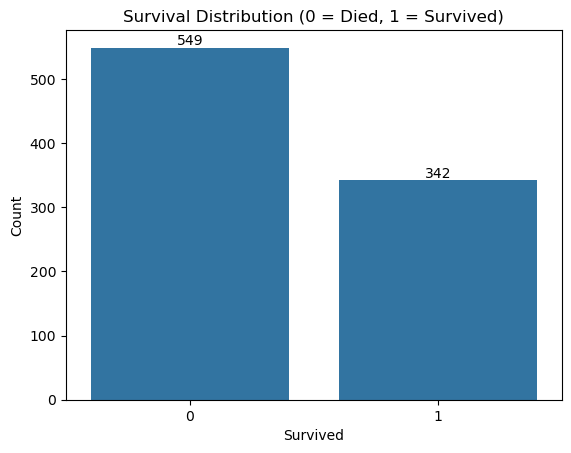

In [10]:
# Survival Distribution
axis = sns.countplot(x='Survived', data=data)
plt.title('Survival Distribution (0 = Died, 1 = Survived)')
plt.xlabel('Survived')
plt.ylabel('Count')
axis.bar_label(axis.containers[0])
plt.show()

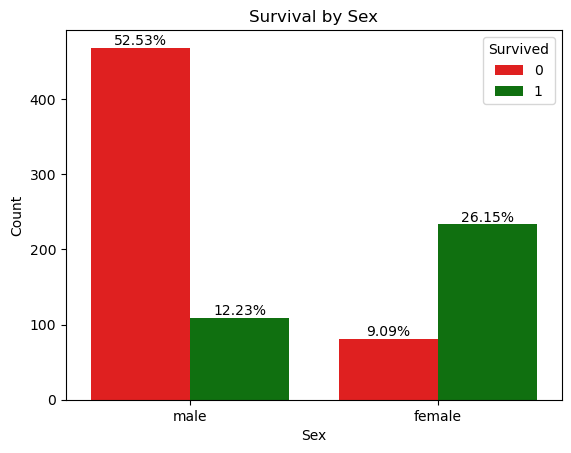

In [28]:
# Survival by Sex
axis = sns.countplot(x='Sex', hue='Survived', data=data, palette=['red','green'])
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
total = len(data)
axis.bar_label(axis.containers[0],labels=[f'{(bar.get_height()/total)*100:.2f}%' for bar in axis.containers[0]])
axis.bar_label(axis.containers[1],labels=[f'{(bar.get_height()/total)*100:.2f}%' for bar in axis.containers[1]])
plt.show()

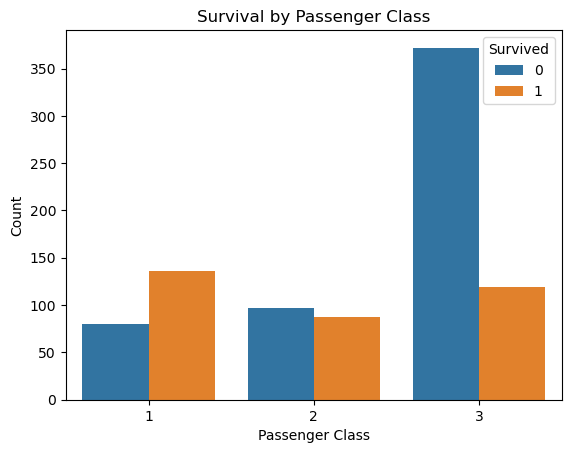

In [11]:
# Survival by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

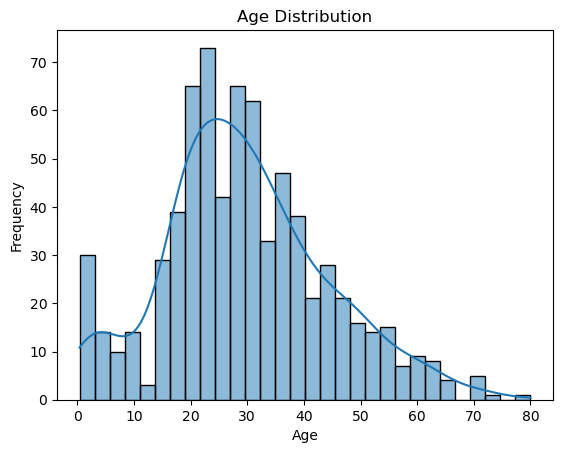

In [12]:
# Age distribution
sns.histplot(data=data, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

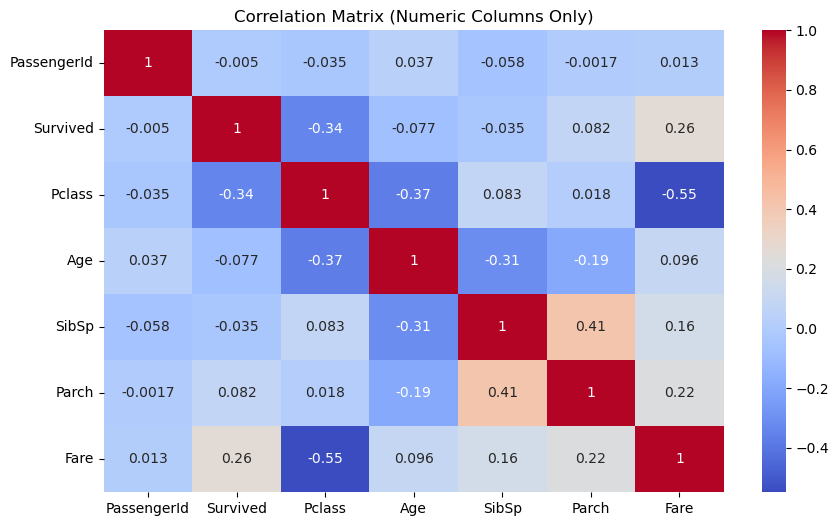

In [13]:
# Correlation Heatmap (numeric only)
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Columns Only)')
plt.show()

# 6 - PREPROCESS THE DATA

In [14]:
print(data.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [15]:
X = data[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
y = data['Survived']

In [16]:
numeric_features = ['Age', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

X_preprocessed = preprocessor.fit_transform(X)


# 7 - SPLIT THE DATA

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)
print(f'Train shape: {X_train.shape}, Test shape: {X_test.shape}')


Train shape: (712, 10), Test shape: (179, 10)


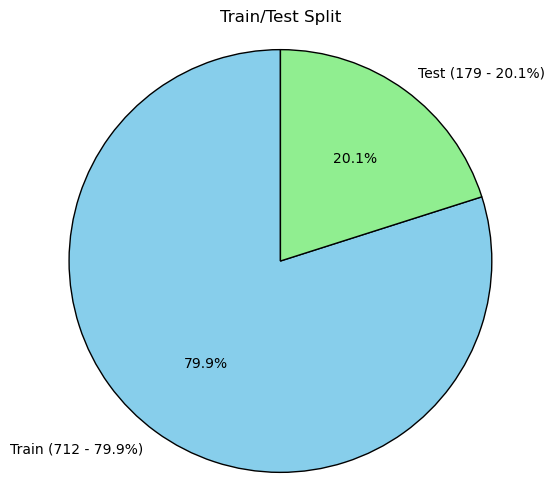

In [18]:
# Visual Pie Chart of the Split
total = len(data)
train_rows, test_rows = len(X_train), len(X_test)

labels = [
    f'Train ({train_rows} - {100*train_rows/total:.1f}%)',
    f'Test ({test_rows} - {100*test_rows/total:.1f}%)'
]

plt.figure(figsize=(6, 6))
plt.pie(
    [train_rows, test_rows],
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightgreen'],
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Train/Test Split')
plt.axis('equal')
plt.show()